Assignment-2: Image Compression Using Principal Component Analysis.


Herald College, University of Wolverhampton

Siman Giri and 5CS037-Team

1st January 2023

1 Assignment Details Due Marks Submission Jan-3rd, 15:00 NST. 10 Rendered .ipynb file//see details below

2 Assignment Overview

This assignment is based on the idea of Dimensionality reduction and Eigen Decomposition, that we did in
week-6. In this assignment you have to extend the idea of Eigen decomposition (Principal Component analysis)
for compression of Image.
This is a group task. Please Read below for detail instruction on formation of Group.

3 Learning Outcomes:
Learning outcomes can be following but not limited to:
1. Understand and use the image manipulation library within python.,
2. Better understand the real world example on the use of Eigen Decomposition,
3. Learn to present your work in a professional and academic manner,
4. Learn to build a project in group.

4 Submission 

The final date for submission is 03-Jan-2022 and 15:00 PM-NST

4.1 Naming Conventions:

You are supposed to follow naming conventions strictly any file not following the naming conventions will be
marked”0”.
File Name: WLVIDFullName(firstname+last).ipynb
Example: 00000ABC Sharma.ipynb

4.2 How to submit:

4.2.1 Group Formation:

You are expected to form group among your peers. You can pick 3 -5 members in your group. Group members
must be from your own section. No cross section group allowed.

1. In Group: You are allowed to write code in group but should submit individual rendered.IPYNB file with
your individual comments. Comments can not be same for two or more members of the group.
You are expected to submit completely rendered .ipynb file named after following naming convention.


4.3 Where to submit:

Designated Portal opened at Google Classroom, where you are supposed to upload the rendered.ipynb,
correctly named before the deadline.
No Late submission allowed.

4.4 Policy on Usage of Pre-built Library:

Please feel free to use any of the pre-built library( for example:sklearn) to solve the task.
But please be advised 2 marks will be penalised
i.e will be deducted in any case you solve your problem with pre-built library .

4.5 After Submission

After the submission you are expected to give a small presentation not long than 7 minutes on the date picked
by your respected tutors. Based on your presentation, there will be individual viva for all group members.
Please Note: No marking without Viva.
Consult with your respected tutor for your viva schedule.

5 Tasks and Marks Division

5.1 Load and Prepare the data: [1]
Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np

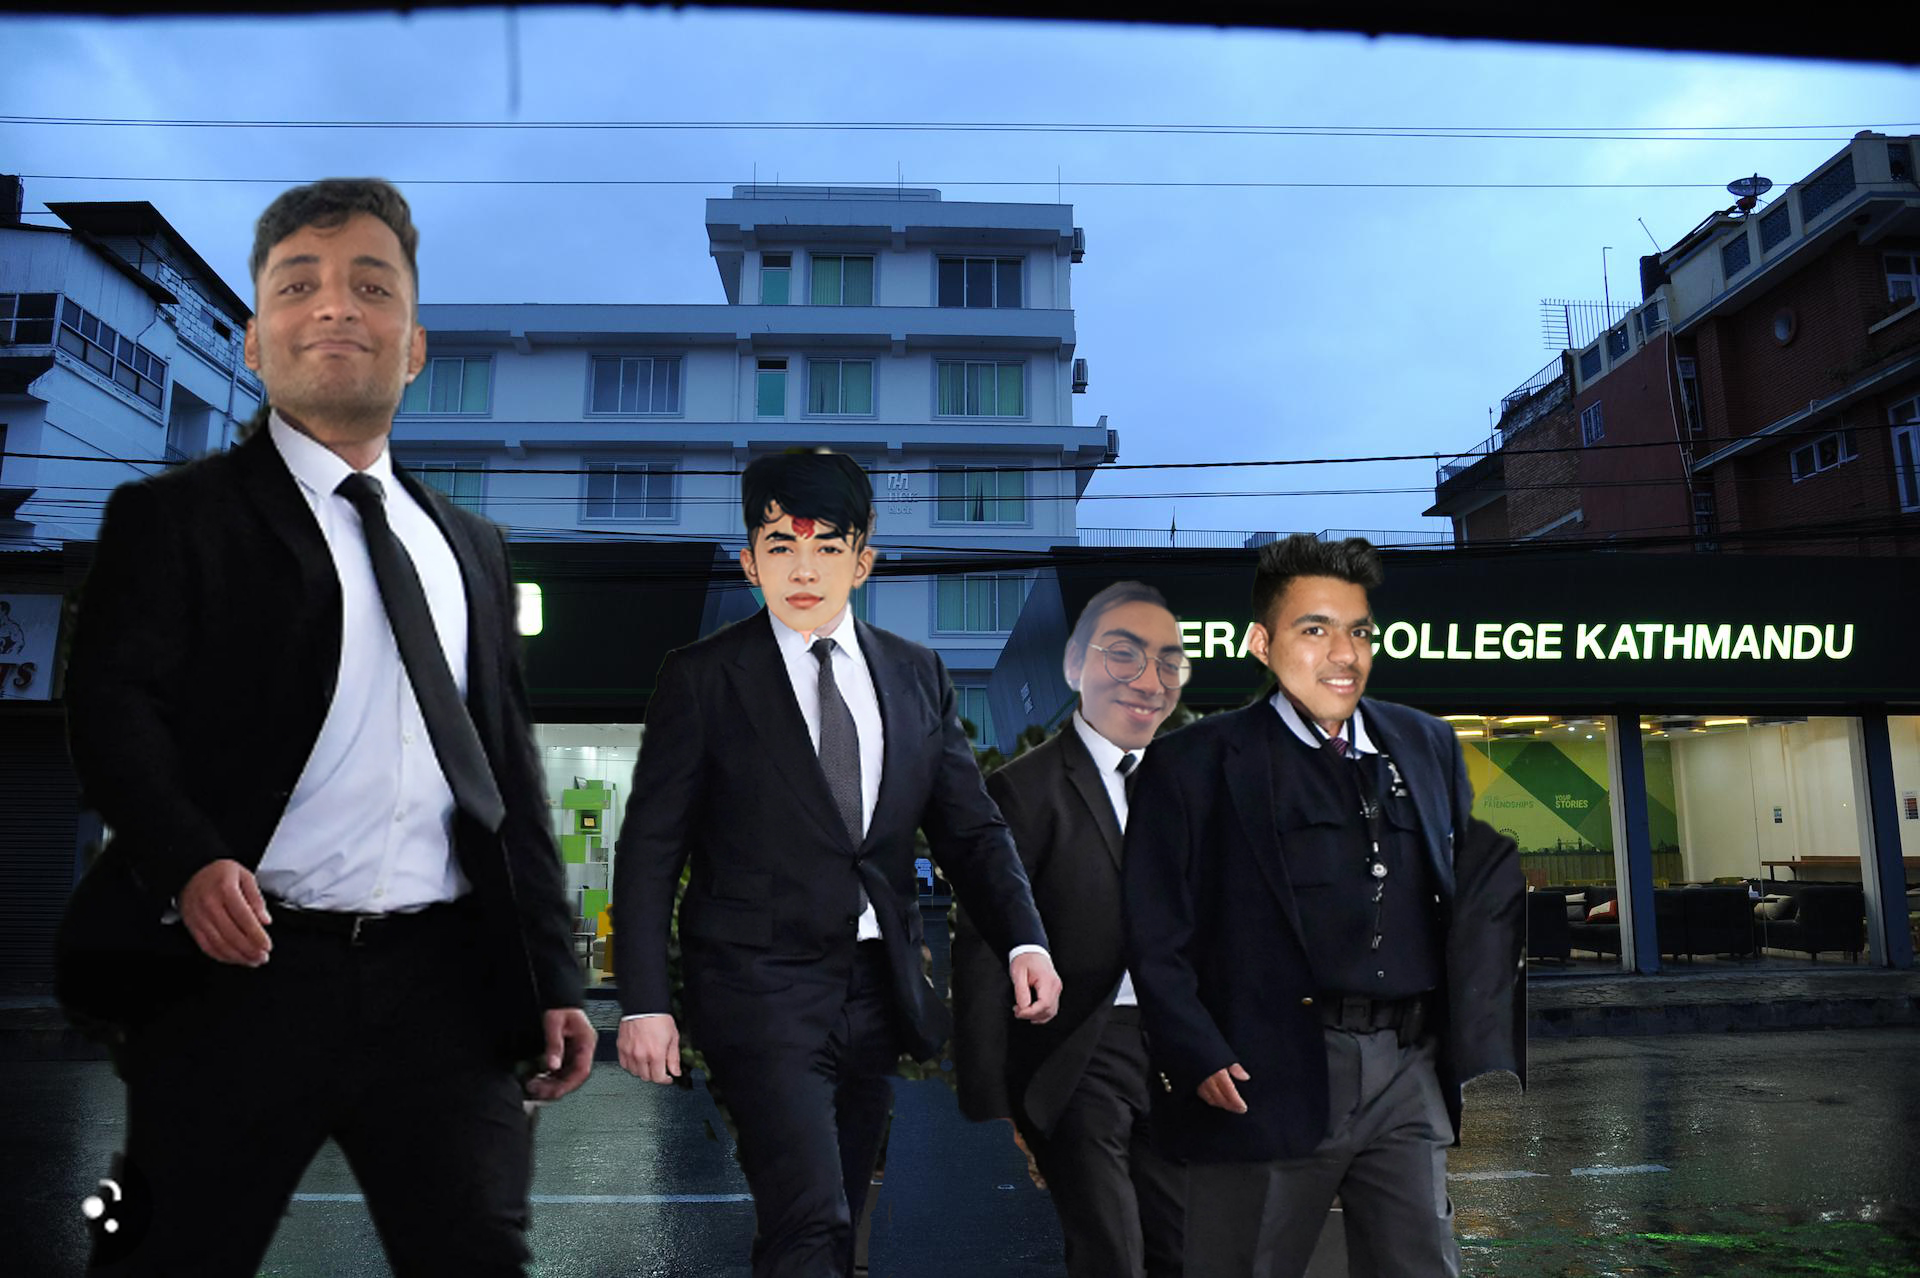

In [20]:
image_path = "/content/drive/MyDrive/Concepts_of_AI/Assignment 2/group.jpg"
image = Image.open(image_path) 
image

2. For the simplicity, convert the image into gray scale i.e. black and white.

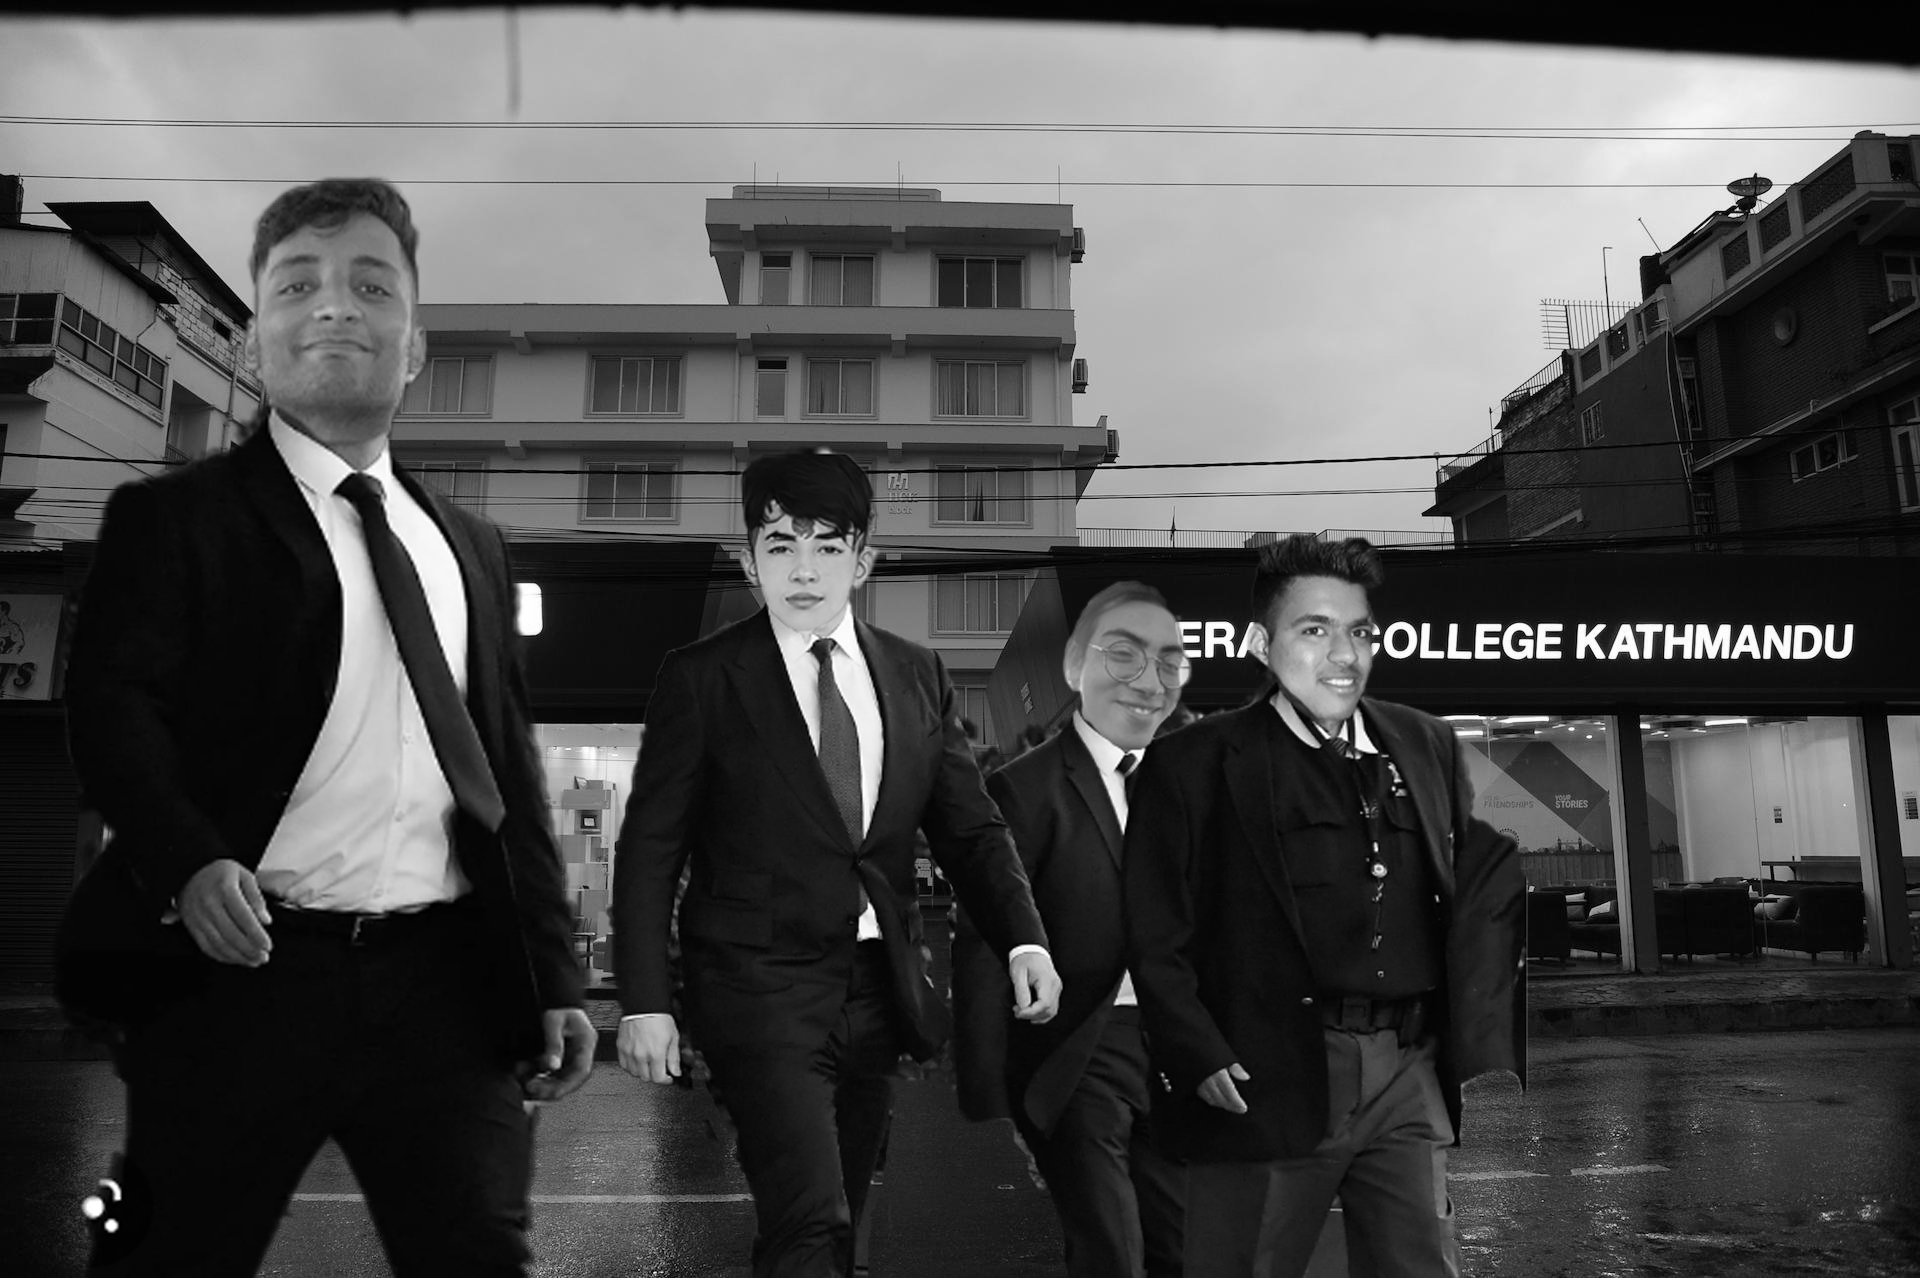

In [21]:
grayscaleImage = image.convert("L")
grayscaleImage

5.2 Standardize/Scale the data:[1]

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:

In [22]:
from sklearn.preprocessing import StandardScaler
data = np.array(grayscaleImage)


#Creating the StandardScaler Object

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data

array([[-0.68158519, -0.68552093, -0.6906668 , ..., -0.79643991,
        -0.79959888, -0.79863336],
       [-0.68158519, -0.68552093, -0.6906668 , ..., -0.79643991,
        -0.79959888, -0.79863336],
       [-0.68158519, -0.68552093, -0.6906668 , ..., -0.79643991,
        -0.79959888, -0.79863336],
       ...,
       [-0.61977824, -0.62431969, -0.62994083, ..., -0.54489432,
        -0.57009021, -0.58951423],
       [-0.61977824, -0.62431969, -0.62994083, ..., -0.48684534,
        -0.51271304, -0.55149257],
       [-0.61977824, -0.62431969, -0.62994083, ..., -0.46749568,
        -0.49358732, -0.53248174]])

5.3 Calculate Covariance Matrix:[1]

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:

In [23]:
covariance_matrix = np.cov(standardized_data,bias = True)
covariance_matrix

array([[0.03972659, 0.03886484, 0.03651153, ..., 0.00567366, 0.0043944 ,
        0.00633467],
       [0.03886484, 0.03819198, 0.03605556, ..., 0.0061843 , 0.00511441,
        0.00689159],
       [0.03651153, 0.03605556, 0.0346133 , ..., 0.00796442, 0.00745636,
        0.00901676],
       ...,
       [0.00567366, 0.0061843 , 0.00796442, ..., 0.10765963, 0.09138546,
        0.07816675],
       [0.0043944 , 0.00511441, 0.00745636, ..., 0.09138546, 0.10659947,
        0.08907   ],
       [0.00633467, 0.00689159, 0.00901676, ..., 0.07816675, 0.08907   ,
        0.09976802]])

5.4 Eigen Decomposition: [2]

Decompose a covariance matrix into eigen values and eigen vectors:
A(n*n)= PDPI

Where:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI
: −Inverse of Eigen Vector.

In [24]:
#Calculating the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigen values are :",eigenvalues)
print("Eigen vectors are :",eigenvectors)

Eigen values are : [1.60443506e+02 8.90866609e+01 6.63713646e+01 ... 5.59683588e-06
 5.48748631e-06 5.47668714e-06]
Eigen vectors are : [[ 1.81209274e-03  1.90575851e-03  7.32217279e-03 ...  7.04335280e-03
   6.88424363e-02  5.67746371e-02]
 [ 1.87856637e-03  2.17144575e-03  7.51055936e-03 ...  1.01050063e-02
  -3.91318974e-02 -1.27864329e-02]
 [ 1.99759021e-03  2.93820502e-03  8.24244240e-03 ... -7.56519894e-02
  -5.68182534e-02 -4.35371346e-02]
 ...
 [ 9.59190335e-03  1.50839388e-02  5.05235489e-03 ...  1.16442900e-03
   3.90950554e-03 -1.98337550e-03]
 [ 9.91552571e-03  1.48309970e-02  4.92498553e-03 ...  2.05057001e-03
  -5.29997707e-04  1.46023110e-03]
 [ 9.73683548e-03  1.36341778e-02  5.17503262e-03 ... -3.20041070e-04
   1.11224427e-03  6.95227654e-05]]


5.5 Identify Principal Components:[2]

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.

• Experiment with Principal Components:
– Pick three different combination of principal components with various explained variance
value and compare the result.

In [25]:
from sklearn.decomposition import PCA

#Applying PCA to the data
pca = PCA()
pca.fit(data)

# calculating the variance by each principal component
explained_variance = pca.explained_variance_ratio_
threshold = 0.95

# experimenting with combinations of principal components
for num_components in [20,30,40]:
    pca = PCA(n_components=num_components)
    pca.fit(data)
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance with {num_components} components: {explained_variance}")

Explained variance with 20 components: [0.52893158 0.10883984 0.07019376 0.0493864  0.04264449 0.02753644
 0.01912865 0.0156047  0.01210816 0.01031307 0.00755264 0.00736973
 0.00631745 0.00523831 0.00480789 0.00473564 0.00403989 0.00374728
 0.00351712 0.00329111]
Explained variance with 30 components: [0.52893158 0.10883984 0.07019376 0.0493864  0.04264449 0.02753644
 0.01912865 0.0156047  0.01210816 0.01031307 0.00755264 0.00736973
 0.00631745 0.00523831 0.00480789 0.00473565 0.00403989 0.00374728
 0.00351712 0.00329111 0.00293153 0.0026802  0.0023494  0.0022961
 0.00209105 0.00196804 0.00187342 0.00172277 0.00157546 0.00148705]
Explained variance with 40 components: [0.52893158 0.10883984 0.07019376 0.0493864  0.04264449 0.02753644
 0.01912865 0.0156047  0.01210816 0.01031307 0.00755264 0.00736973
 0.00631745 0.00523831 0.00480789 0.00473565 0.00403989 0.00374728
 0.00351712 0.00329111 0.00293153 0.0026802  0.0023494  0.0022961
 0.00209105 0.00196804 0.00187342 0.00172278 0.00157558 

5.6 Reconstruction of the image: [3]

Reconstruct the image based on number of principal components you picked in step 

4.5.
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

In [26]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

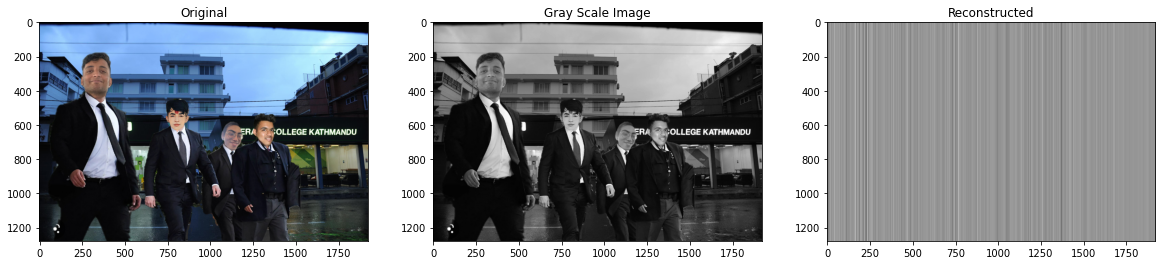

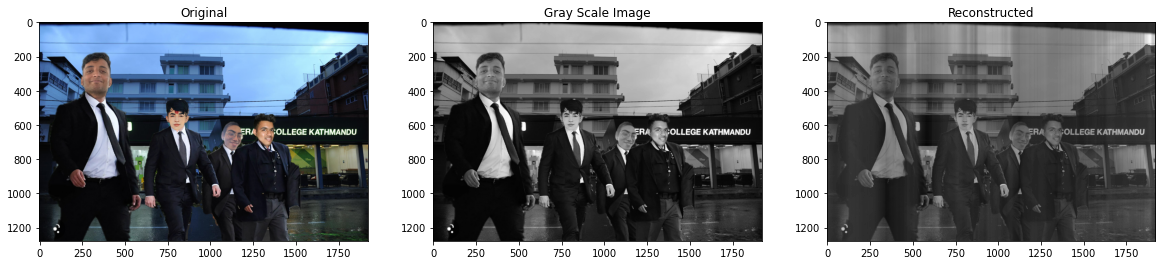

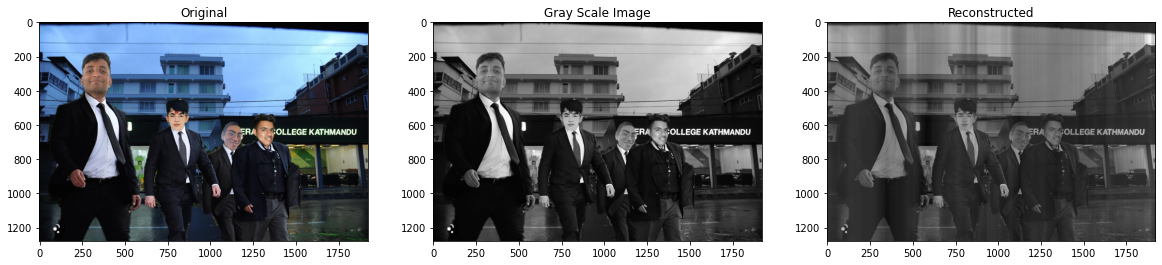

In [27]:
for n in [0,480,720]:
  #Applying PCA to the data
  pca = PCA(n_components=n)
  image_pca = pca.fit_transform(standardized_data)

  #Reconstructing the image by using inverse_transform method
  image_reconstructed = pca.inverse_transform(image_pca)

  #Plotting the original and reconstructed image
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))
  axs[0].imshow(image)
  axs[0].set_title('Original')
  axs[1].imshow(grayscaleImage, cmap='gray')
  axs[1].set_title('Gray Scale Image')
  axs[2].imshow(image_reconstructed, cmap='gray')
  axs[2].set_title('Reconstructed')
  plt.show()